In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('solar_output.csv')

This is a regression problem. We have to predict the solar output in kWh given the conditions.

In [30]:
df.head()

,Date,Temperature_C,Irradiance_W/m2,WindSpeed_m/s,Humidity_%,SolarOutput_kWh
0,2024-01-01,32.483571,458.462926,3.357787,41.710050,145.859229
1,2024-01-02,29.308678,557.935468,3.560785,44.398190,204.342949
2,2024-01-03,33.238443,565.728548,4.083051,57.472936,197.465684
3,2024-01-04,37.615149,519.772273,4.053802,56.103703,184.772057
4,2024-01-05,28.829233,583.871429,1.622331,49.790984,218.484633


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             100 non-null    object 
 1   Temperature_C    100 non-null    float64
 2   Irradiance_W/m2  100 non-null    float64
 3   WindSpeed_m/s    100 non-null    float64
 4   Humidity_%       100 non-null    float64
 5   SolarOutput_kWh  100 non-null    float64
dtypes: float64(5), object(1)
memory usage: 4.8+ KB


## Data processing
convert date data type to date


In [32]:
df.isnull().sum()

Date               0
Temperature_C      0
Irradiance_W/m2    0
WindSpeed_m/s      0
Humidity_%         0
SolarOutput_kWh    0
dtype: int64

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

Processing datetime features for regression models requires converting them into numeric representations that the model can use. 

In [34]:
# df['year'] = df['Date'].dt.year no need of year as all data is for the year of 2024.
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [35]:
df.head()

,Date,Temperature_C,Irradiance_W/m2,WindSpeed_m/s,Humidity_%,SolarOutput_kWh,month,day
0,2024-01-01,32.483571,458.462926,3.357787,41.710050,145.859229,1,1
1,2024-01-02,29.308678,557.935468,3.560785,44.398190,204.342949,1,2
2,2024-01-03,33.238443,565.728548,4.083051,57.472936,197.465684,1,3
3,2024-01-04,37.615149,519.772273,4.053802,56.103703,184.772057,1,4
4,2024-01-05,28.829233,583.871429,1.622331,49.790984,218.484633,1,5


In [36]:
# Assume df is your DataFrame
cols = list(df.columns)

# Get last two columns
last_two = cols[-2:]

# Get all other columns (excluding last two)
remaining = cols[:-2]

# Reorder columns
df = df[last_two + remaining]
df.head()

,month,day,Date,Temperature_C,Irradiance_W/m2,WindSpeed_m/s,Humidity_%,SolarOutput_kWh
0,1,1,2024-01-01,32.483571,458.462926,3.357787,41.710050,145.859229
1,1,2,2024-01-02,29.308678,557.935468,3.560785,44.398190,204.342949
2,1,3,2024-01-03,33.238443,565.728548,4.083051,57.472936,197.465684
3,1,4,2024-01-04,37.615149,519.772273,4.053802,56.103703,184.772057
4,1,5,2024-01-05,28.829233,583.871429,1.622331,49.790984,218.484633


In [37]:
# df.drop(columns=["Date"],inplace=True)

In [38]:
df.head()

,month,day,Date,Temperature_C,Irradiance_W/m2,WindSpeed_m/s,Humidity_%,SolarOutput_kWh
0,1,1,2024-01-01,32.483571,458.462926,3.357787,41.710050,145.859229
1,1,2,2024-01-02,29.308678,557.935468,3.560785,44.398190,204.342949
2,1,3,2024-01-03,33.238443,565.728548,4.083051,57.472936,197.465684
3,1,4,2024-01-04,37.615149,519.772273,4.053802,56.103703,184.772057
4,1,5,2024-01-05,28.829233,583.871429,1.622331,49.790984,218.484633


In [39]:
df.describe()

,month,day,Date,Temperature_C,Irradiance_W/m2,WindSpeed_m/s,Humidity_%,SolarOutput_kWh
count,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.180000,14.720000,2024-02-19 12:00:00,29.480767,602.230459,3.064896,51.068401,226.755007
min,1.000000,1.000000,2024-01-01 00:00:00,16.901274,408.122878,-0.241267,28.761043,99.985366
25%,1.000000,7.000000,2024-01-25 18:00:00,26.995472,519.433948,2.344556,44.329807,188.361603
50%,2.000000,14.000000,2024-02-19 12:00:00,29.365219,608.410717,3.097696,50.501574,223.895381
75%,3.000000,22.250000,2024-03-15 06:00:00,32.029760,653.817045,3.704437,56.840007,266.476940
max,4.000000,31.000000,2024-04-09 00:00:00,39.261391,872.016917,6.852731,71.898029,391.585723
std,0.978352,8.991668,NaN,4.540842,95.366897,1.084283,8.841014,57.554408


## EDA

### Univariate analysis

<Axes: xlabel='Temperature_C', ylabel='Count'>

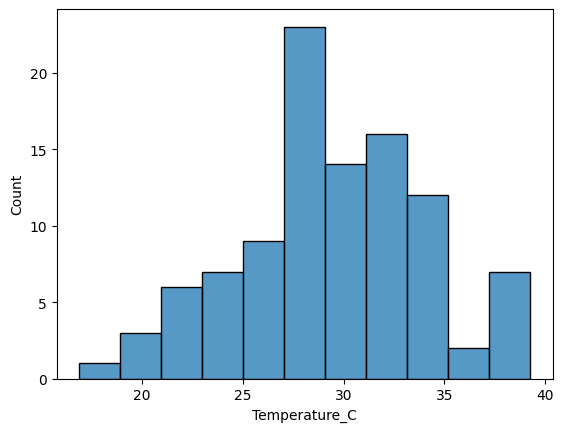

In [40]:
sns.histplot(df,x='Temperature_C')

<Axes: xlabel='Irradiance_W/m2', ylabel='Count'>

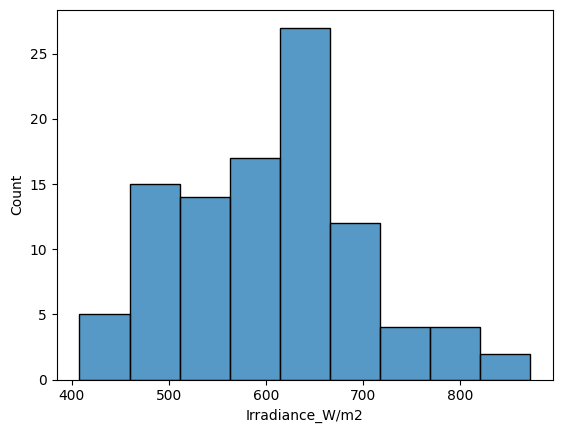

In [41]:
sns.histplot(df,x='Irradiance_W/m2')

<Axes: xlabel='WindSpeed_m/s', ylabel='Count'>

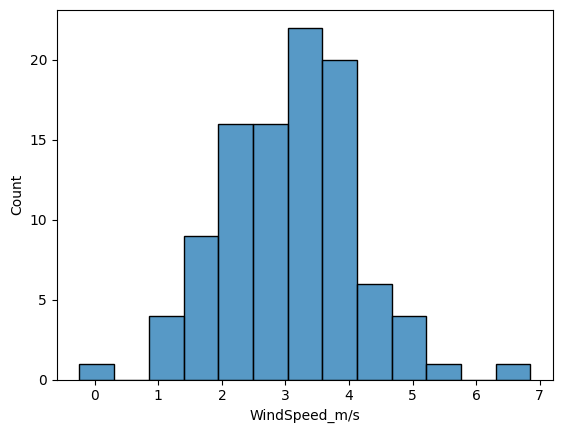

In [42]:
sns.histplot(df,x='WindSpeed_m/s')

<Axes: xlabel='Humidity_%', ylabel='Count'>

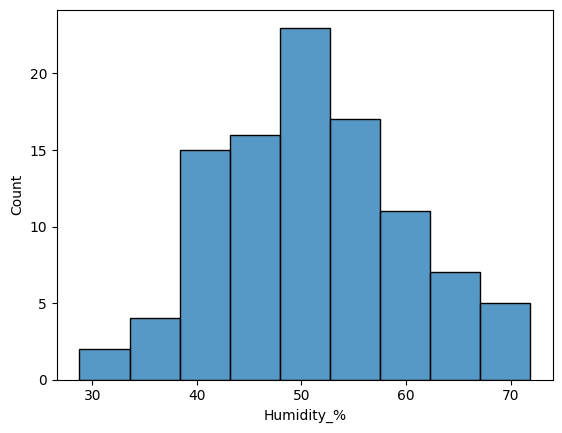

In [43]:
sns.histplot(df,x='Humidity_%')

array([[<Axes: title={'center': 'Temperature_C'}>,
        <Axes: title={'center': 'Irradiance_W/m2'}>],
       [<Axes: title={'center': 'WindSpeed_m/s'}>,
        <Axes: title={'center': 'Humidity_%'}>],
       [<Axes: title={'center': 'SolarOutput_kWh'}>, <Axes: >]],
      dtype=object)

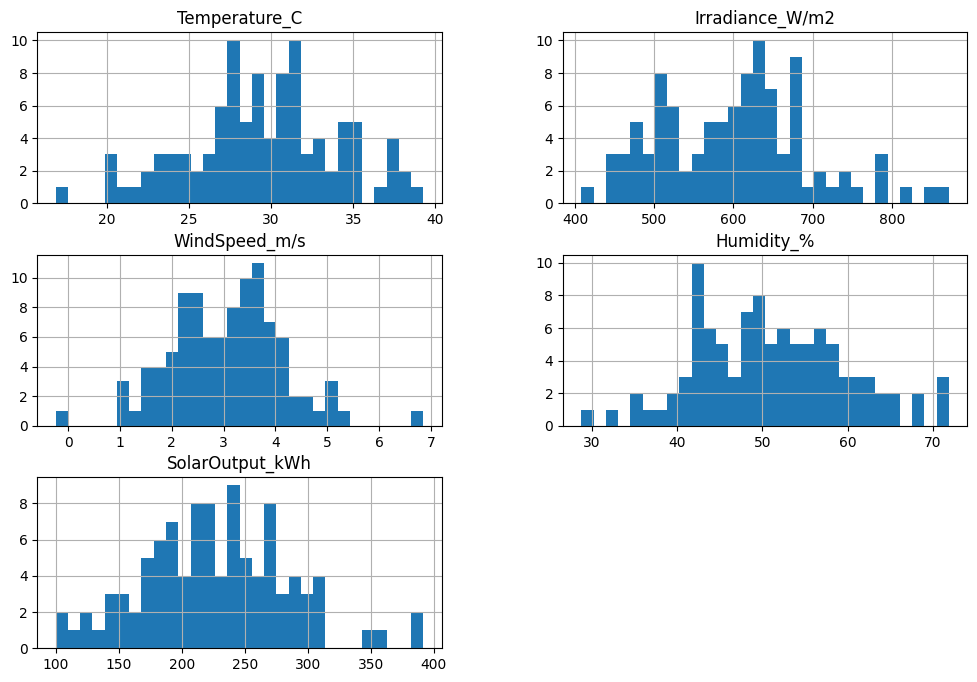

In [44]:
df[['Temperature_C', 'Irradiance_W/m2', 'WindSpeed_m/s', 'Humidity_%', 'SolarOutput_kWh']].hist(bins=30, figsize=(12,8))

### Bivariate analysis

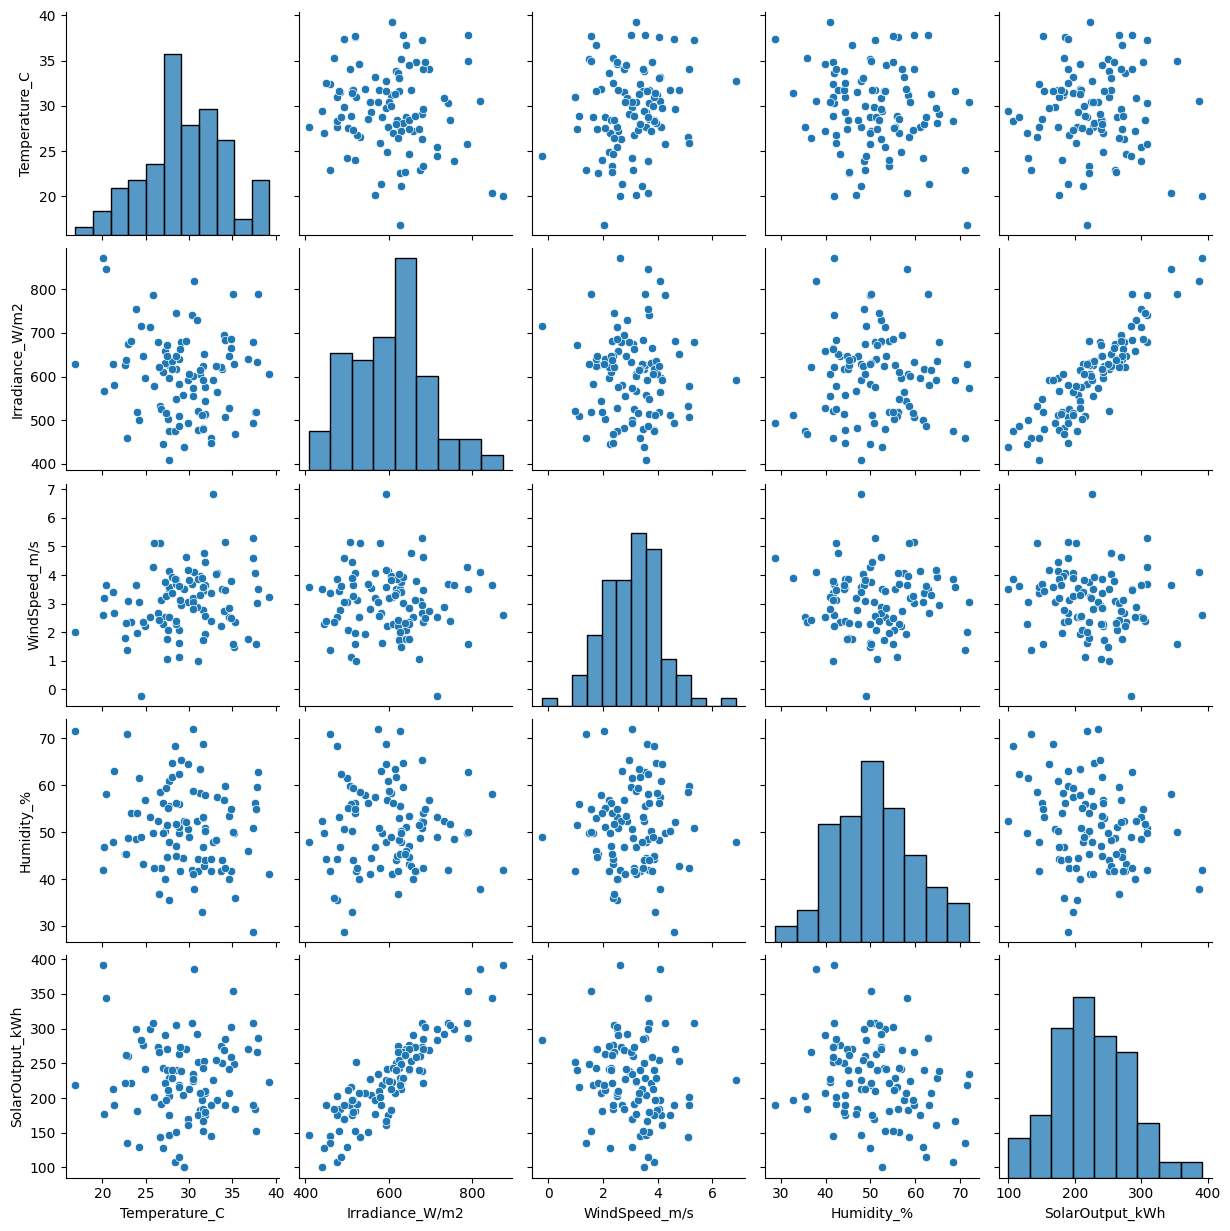

In [45]:
sns.pairplot(df.iloc[:,2:])

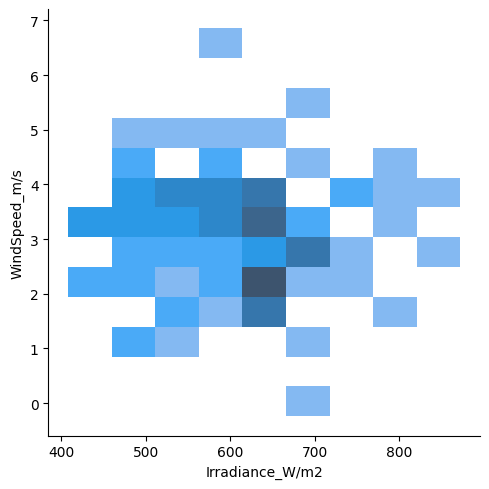

In [46]:
sns.displot(df,x='Irradiance_W/m2', y= 'WindSpeed_m/s')

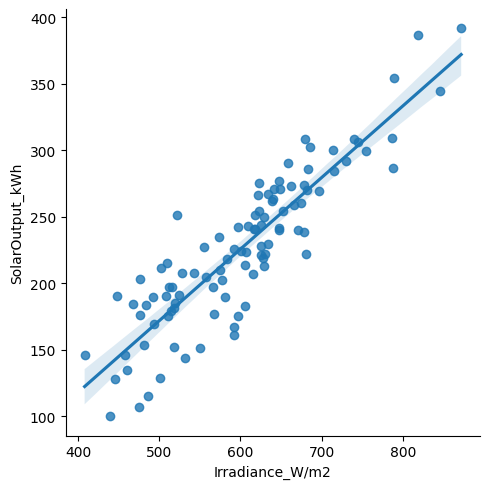

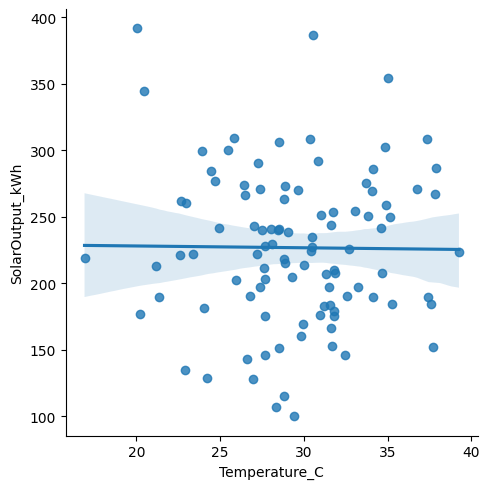

In [47]:
sns.lmplot(x='Irradiance_W/m2', y='SolarOutput_kWh', data=df)
sns.lmplot(x='Temperature_C', y='SolarOutput_kWh', data=df)

<Axes: title={'center': 'Average Monthly Solar Output'}, xlabel='month'>

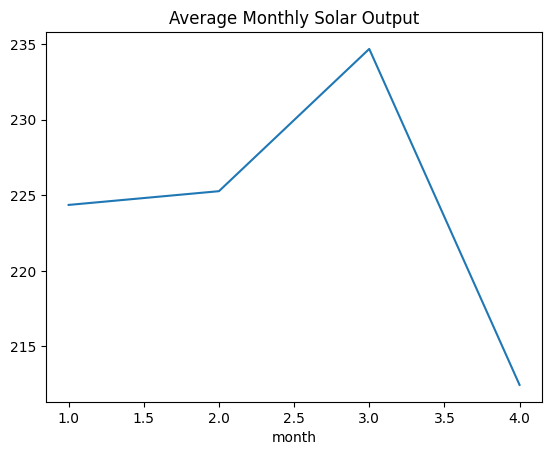

In [48]:
df.groupby(df['month'])['SolarOutput_kWh'].mean().plot(title='Average Monthly Solar Output')


<Axes: title={'center': 'Hourly Solar Output Pattern'}, xlabel='day'>

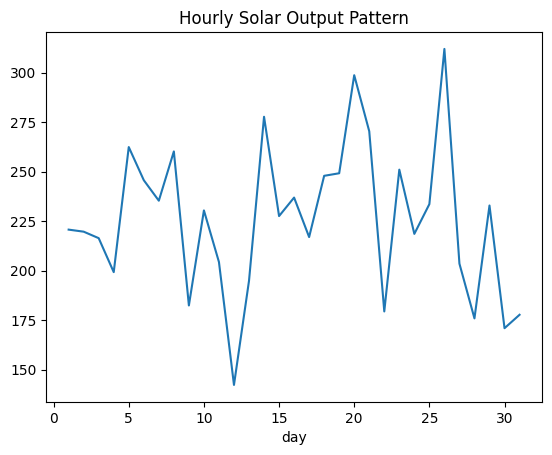

In [49]:
df.groupby(df['day'])['SolarOutput_kWh'].mean().plot(title='Hourly Solar Output Pattern')  

## Training models

In [50]:
df.drop

<bound method DataFrame.drop of     month  day       Date  Temperature_C  Irradiance_W/m2  WindSpeed_m/s  \
0       1    1 2024-01-01      32.483571       458.462926       3.357787   
1       1    2 2024-01-02      29.308678       557.935468       3.560785   
2       1    3 2024-01-03      33.238443       565.728548       4.083051   
3       1    4 2024-01-04      37.615149       519.772273       4.053802   
4       1    5 2024-01-05      28.829233       583.871429       1.622331   
..    ...  ...        ...            ...              ...            ...   
95      4    5 2024-04-05      22.682425       638.531738       2.307090   
96      4    6 2024-04-06      31.480601       511.614256       3.899600   
97      4    7 2024-04-07      31.305276       615.372511       3.307300   
98      4    8 2024-04-08      30.025567       605.820872       3.812862   
99      4    9 2024-04-09      28.827064       485.702970       3.629629   

    Humidity_%  SolarOutput_kWh  
0    41.710050       

In [51]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [52]:
X.head()

,month,day,Date,Temperature_C,Irradiance_W/m2,WindSpeed_m/s,Humidity_%
0,1,1,2024-01-01,32.483571,458.462926,3.357787,41.710050
1,1,2,2024-01-02,29.308678,557.935468,3.560785,44.398190
2,1,3,2024-01-03,33.238443,565.728548,4.083051,57.472936
3,1,4,2024-01-04,37.615149,519.772273,4.053802,56.103703
4,1,5,2024-01-05,28.829233,583.871429,1.622331,49.790984


In [53]:
y.head()

0    145.859229
1    204.342949
2    197.465684
3    184.772057
4    218.484633
Name: SolarOutput_kWh, dtype: float64

In [54]:
X.drop(columns=["Date"],inplace=True)

In [55]:
from sklearn.model_selection import train_test_split

# Suppose X contains features and y is the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [57]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(),
    "NeuralNetwork": MLPRegressor(max_iter=1000)
}

In [58]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    results[name] = score

# Show results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R2 Score']).sort_values(by='R2 Score', ascending=False)
print(results_df)

                  R2 Score
Lasso             0.894504
Ridge             0.886967
LinearRegression  0.886653
RandomForest      0.874556
KNeighbors        0.866265
GradientBoosting  0.812587
NeuralNetwork     0.757806
DecisionTree      0.653821
SVR               0.068983


## With standard scaling 

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
scaler.fit(X_train)

StandardScaler()

In [61]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)
    results[name] = score

# Show results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R2 Score']).sort_values(by='R2 Score', ascending=False)
print(results_df)

                  R2 Score
Lasso             0.898353
LinearRegression  0.886653
Ridge             0.886093
RandomForest      0.881854
GradientBoosting  0.819309
KNeighbors        0.661630
DecisionTree      0.646748
SVR               0.087257
NeuralNetwork    -0.743604


c:\Users\Swapnil Paranjape\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


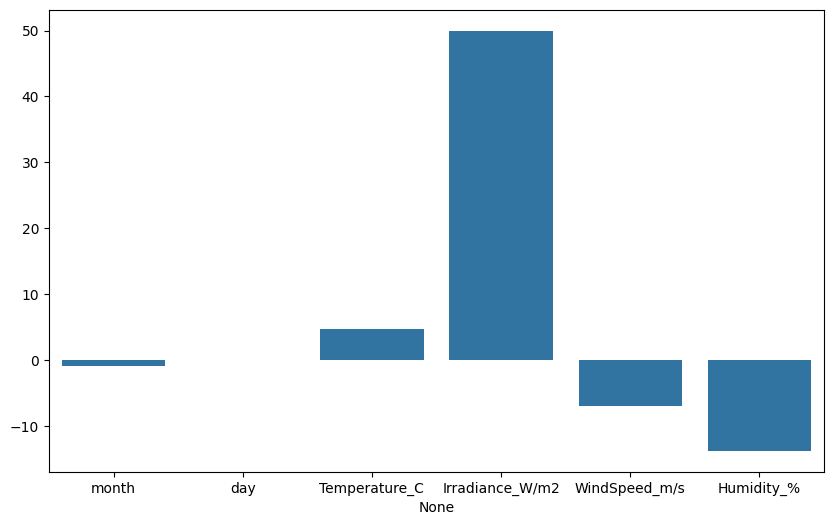

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x =X.columns,y= models["Lasso"].coef_)
plt.show()